In [2]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers
from sklearn.svm import SVR
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered, outliers = exclude_outliers(X, y)

# The process was not terminating for a long time...
# param_grid_svr = {
#     'kernel': ['poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3],  # Only relevant for 'poly' kernel
#     'gamma': ['scale', 'auto'],
#     'coef0': [0.0, 0.1, 1.0],  # Only relevant for 'poly' and 'sigmoid' kernels
#     'C': [0.1, 10, 50, 100],
#     'epsilon': [0.01, 0.1],
#     'shrinking': [True, False]
# }

svr = SVR(kernel='rbf', C=10, epsilon=0.1)
# svr = SVR(**param_grid_svr)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



K-fold
R squared (CV): 0.08761303031108747
Average MSE (CV): 109.29754321004944
Average RMSE (CV): 10.454546532970689
Average MAE (CV): 4.500216302543678


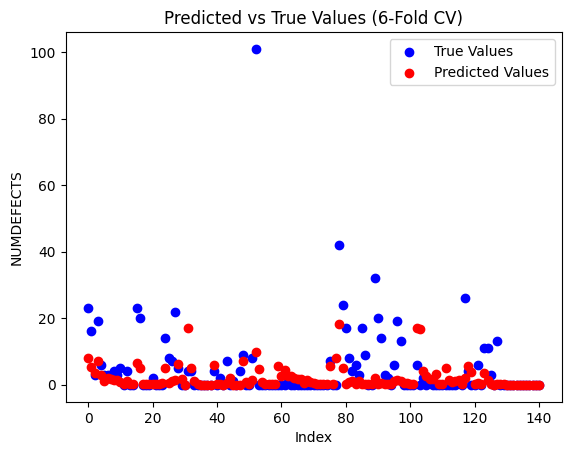

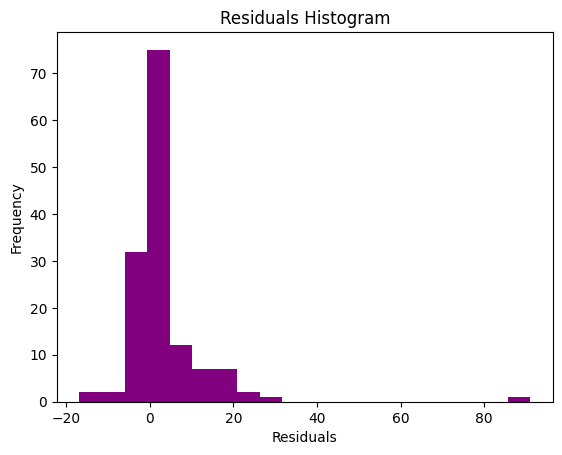

In [3]:
print('\nK-fold')
k_fold_cv(X, y, svr, 6)

LOOCV
R squared (LOOCV): 0.14064623031319845
Average MSE (LOOCV): 102.94453877074419
Average RMSE (LOOCV): 10.14615881852557
Average MAE (LOOCV): 4.1220480042793515


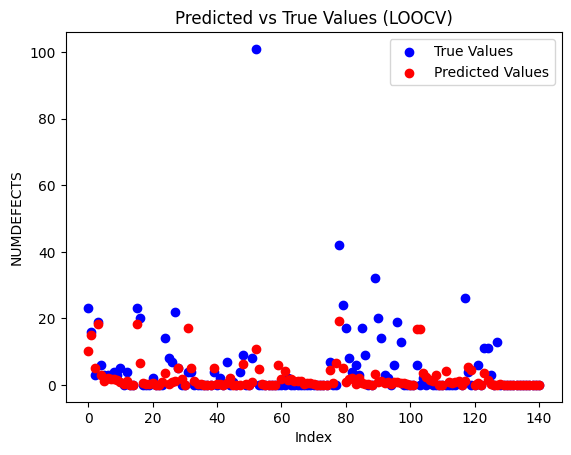

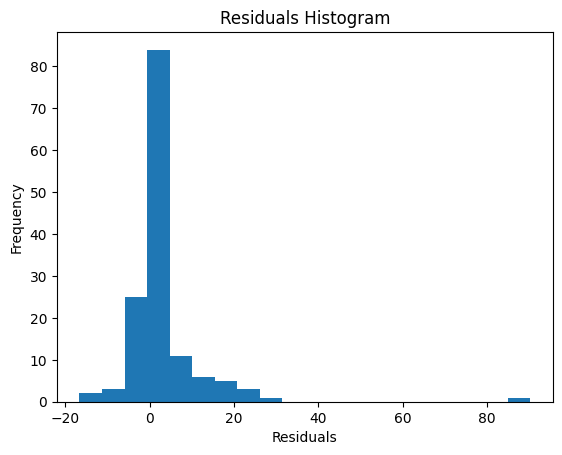

In [33]:
print('LOOCV')
loocv(X, y, svr)

LOOCV
R squared (LOOCV): 0.024026443103342343
Average MSE (LOOCV): 40.52350643017858
Average RMSE (LOOCV): 6.365807602353262
Average MAE (LOOCV): 3.309471047419019


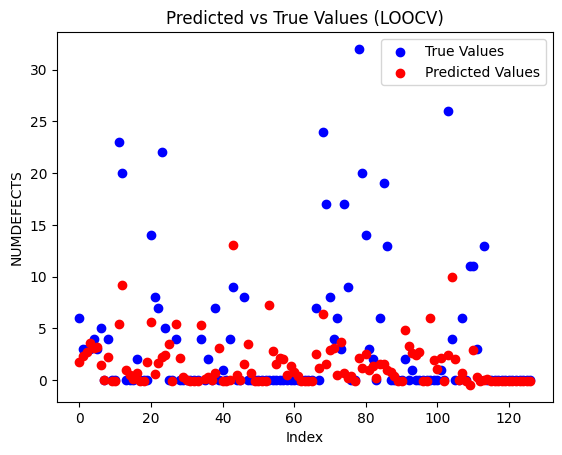

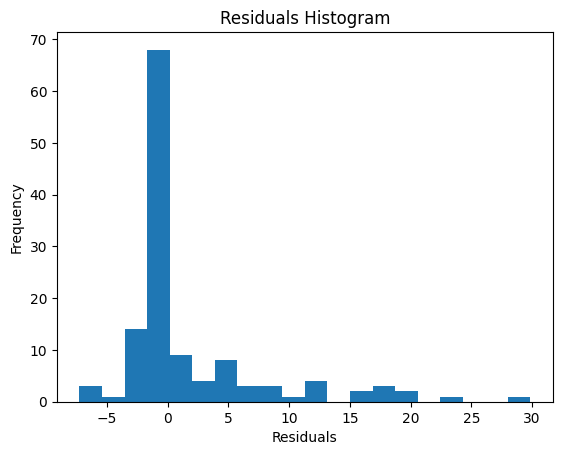


6-fold
R squared (CV): -0.014744186077780164
Average MSE (CV): 42.13330602958478
Average RMSE (CV): 6.491017333945796
Average MAE (CV): 3.4916919260239743


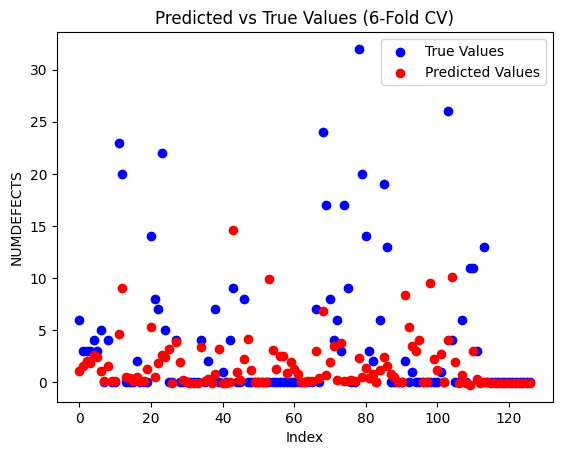

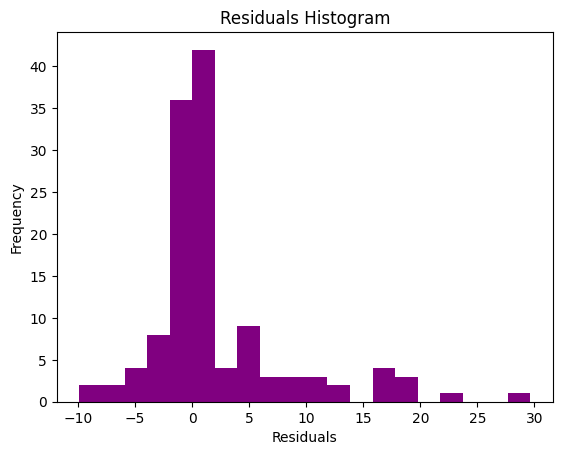

In [4]:
print('LOOCV')
loocv(X_filtered, y_filtered, svr)

print('\n6-fold')
k_fold_cv(X_filtered, y_filtered, svr, 6)